In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Statsmodels import
import statsmodels.api as sm

In [68]:
# =============================================================================
# Data Loading and Preprocessing
# =============================================================================

# Load the dataset from CSV file
file_path = "hospital.csv"
df = pd.read_csv(file_path)

# Convert 'SurgDate' column to datetime (day-first format)
df['SurgDate'] = pd.to_datetime(df['SurgDate'], dayfirst=True)

# Clean data: Drop rows with NaN or infinite values in 'Actual'
df = df.dropna(subset=['Actual'])
df = df[~df['Actual'].isin([np.inf, -np.inf])]

# Compute Day of Week (DOW) from 'SurgDate'
df['DOW'] = df['SurgDate'].dt.day_name()

In [30]:
df

,SurgDate,DOW,T_28,T_21,T_14,T_13,T_12,T_11,T_10,T_9,T_8,T_7,T_6,T_5,T_4,T_3,T_2,T_1,Actual
0,2011-10-10,Monday,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,2011-10-11,Tuesday,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,2011-10-12,Wednesday,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,2011-10-13,Thursday,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,2011-10-14,Friday,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2012-09-10,Monday,33,49,68,71,82,84,86,86,86,86,91,97,101,103,109,110,118
237,2012-09-11,Tuesday,31,56,68,70,74,78,78,78,78,80,88,94,97,98,98,99,108
238,2012-09-12,Wednesday,39,49,69,78,81,82,82,82,85,88,96,99,99,100,104,115,121
239,2012-09-13,Thursday,34,51,68,77,75,75,75,79,89,92,98,99,99,97,101,106,114


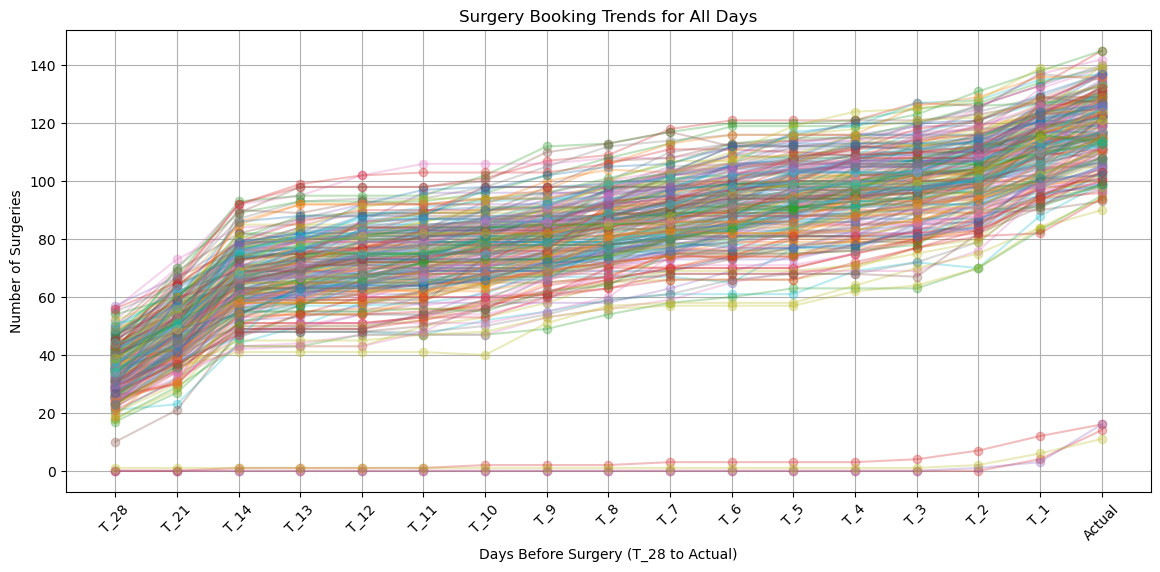

In [32]:
# =============================================================================
# Visualization 2: Surgery Booking Trends for All Days
# =============================================================================

plt.figure(figsize=(14, 6))
for index, row in df.iterrows():
    y_values = row[2:].values  # Values for columns T_28 to Actual
    plt.plot(x_values, y_values, marker='o', linestyle='-', alpha=0.3)
plt.xlabel("Days Before Surgery (T_28 to Actual)")
plt.ylabel("Number of Surgeries")
plt.title("Surgery Booking Trends for All Days")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


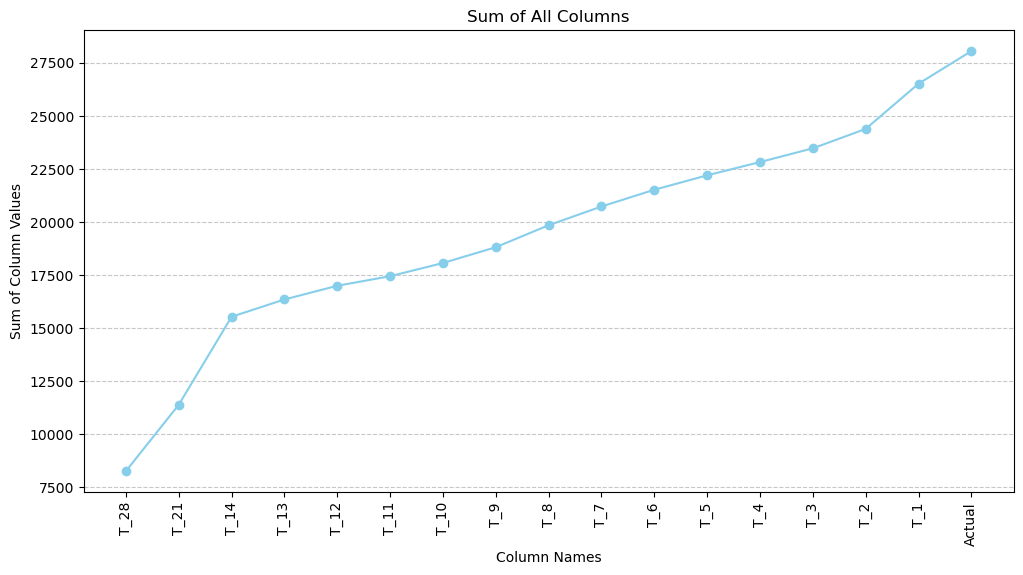

In [33]:
# =============================================================================
# Visualization 3: Sum of All Numeric Columns
# =============================================================================

# Compute the sum for each numeric column
column_sums = df.sum(numeric_only=True)

plt.figure(figsize=(12, 6))
plt.plot(column_sums.index, column_sums.values, color='skyblue', marker='o', linestyle='-')
plt.xlabel("Column Names")
plt.ylabel("Sum of Column Values")
plt.title("Sum of All Columns")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

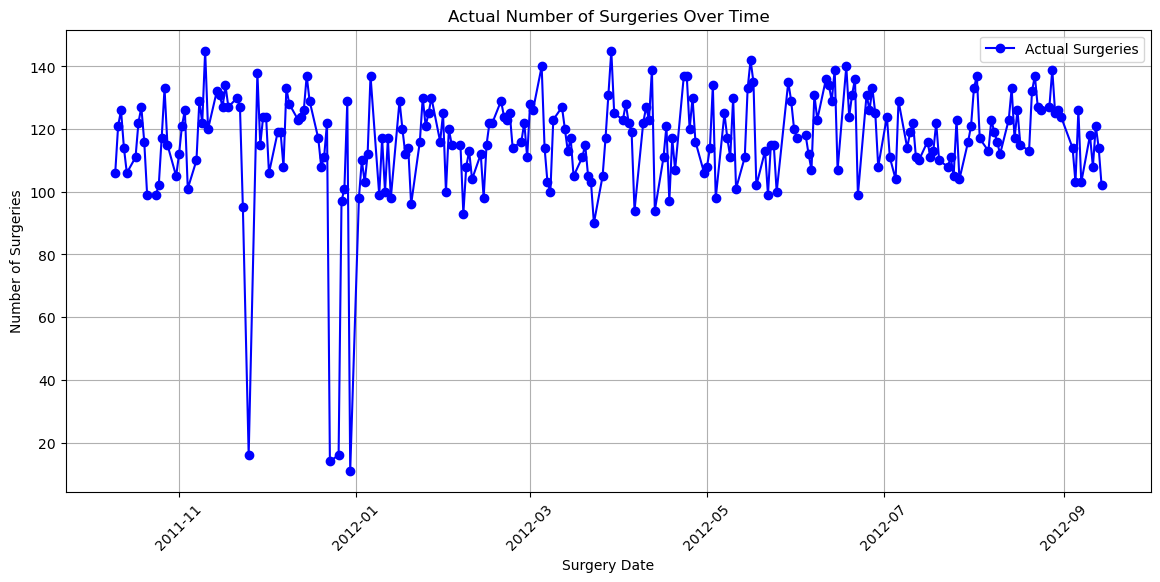

In [34]:
# =============================================================================
# Visualization 4: Actual Number of Surgeries Over Time
# =============================================================================

plt.figure(figsize=(14, 6))
plt.plot(df['SurgDate'], df['Actual'], marker='o', linestyle='-', color='b', label="Actual Surgeries")
plt.xlabel("Surgery Date")
plt.ylabel("Number of Surgeries")
plt.title("Actual Number of Surgeries Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

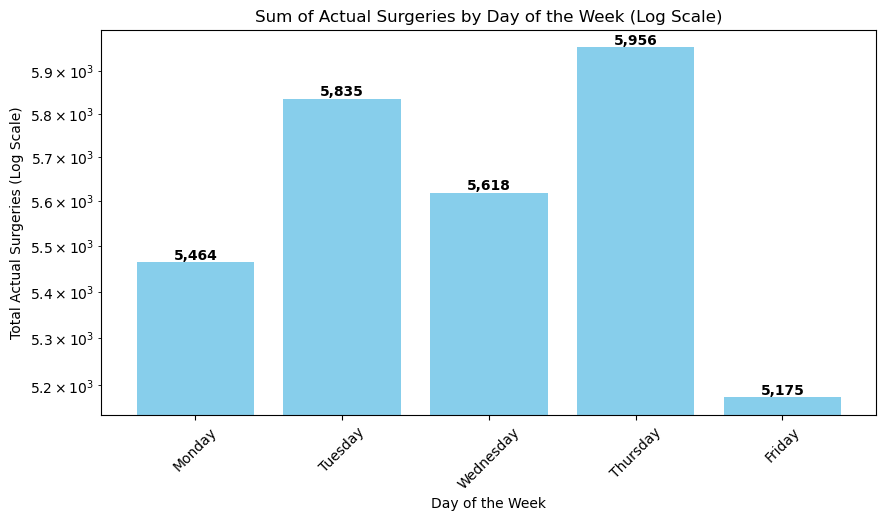

In [35]:
# =============================================================================
# Visualization 5: Sum of Actual Surgeries by Day of the Week (Log Scale)
# =============================================================================

# Group data by day of the week and sum 'Actual'
dow_actual_sum = df.groupby('DOW')['Actual'].sum()

# Reorder days (Monday to Sunday)
dow_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
dow_actual_sum = dow_actual_sum.reindex(dow_order)

plt.figure(figsize=(10, 5))
bars = plt.bar(dow_actual_sum.index, dow_actual_sum.values, color='skyblue')
plt.yscale('log')
plt.xlabel("Day of the Week")
plt.ylabel("Total Actual Surgeries (Log Scale)")
plt.title("Sum of Actual Surgeries by Day of the Week (Log Scale)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    if np.isfinite(yval):
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', 
                 fontsize=10, fontweight='bold')
plt.show()

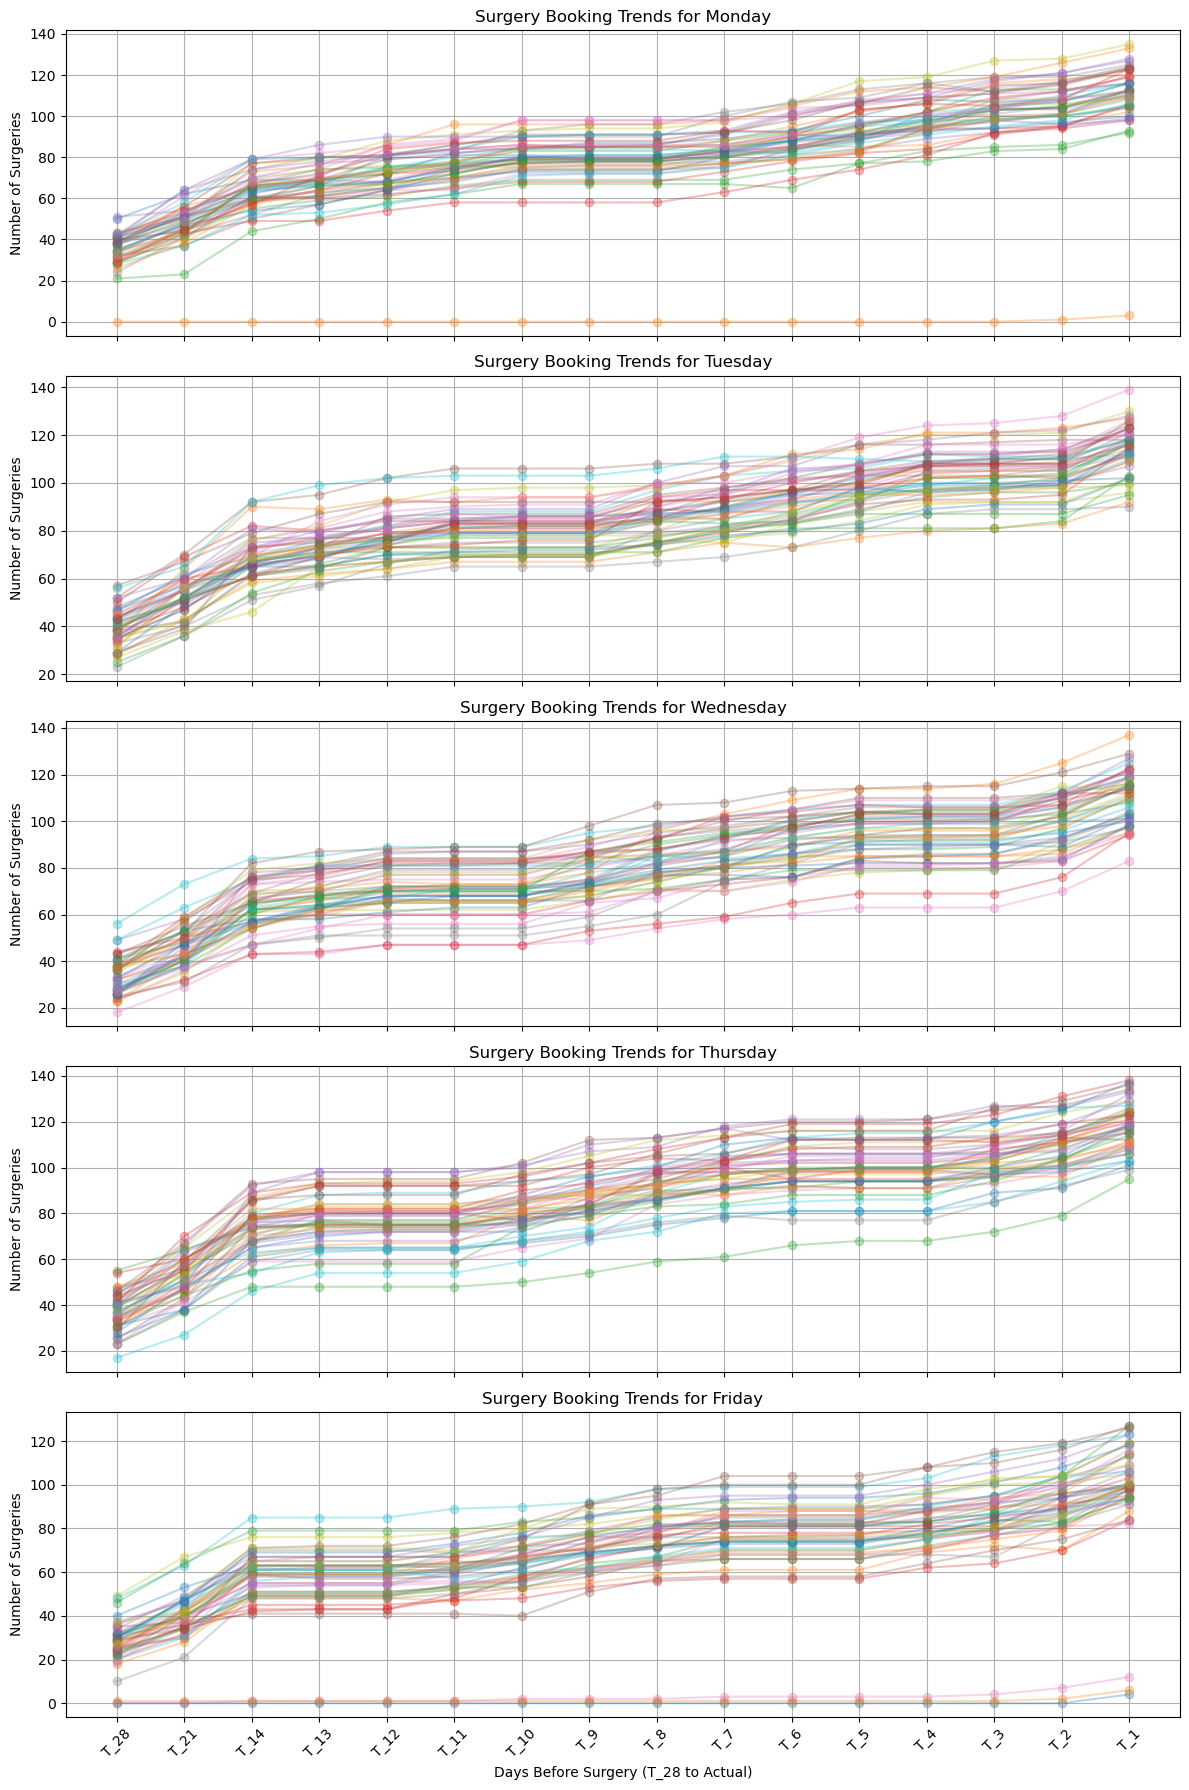

In [36]:
# =============================================================================
# Visualization 6: Surgery Booking Trends for Each Weekday (Monday to Friday)
# =============================================================================

# Define weekdays and extract time-related columns (excluding the 'DOW' column)
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
x_values = df.columns[2:-1]  # Assumes last column is 'DOW'

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 18), sharex=True)
for i, day in enumerate(weekdays):
    df_day = df[df['DOW'] == day]
    ax = axes[i]
    for index, row in df_day.iterrows():
        y_values = row[2:-1].values  # Exclude the 'DOW' column
        ax.plot(x_values, y_values, marker='o', linestyle='-', alpha=0.3)
    ax.set_title(f"Surgery Booking Trends for {day}")
    ax.set_ylabel("Number of Surgeries")
    ax.grid(True)
plt.xlabel("Days Before Surgery (T_28 to Actual)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

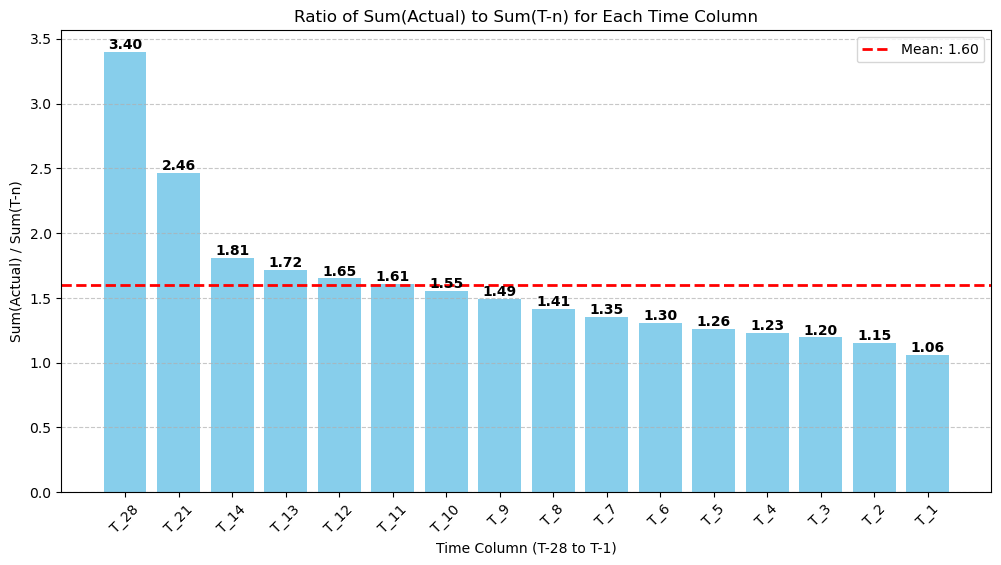

In [37]:
# =============================================================================
# Visualization 7: Ratio of Sum(Actual) to Sum(T-n) for Each Time Column (Overall)
# =============================================================================

# Identify time-related columns (assumed to be from the 3rd column to the column before 'DOW')
time_columns = df.columns[2:-1]

# Compute ratio for each time column
ratios = {col: df['Actual'].sum() / df[col].sum() for col in time_columns}
ratios_df = pd.DataFrame(list(ratios.items()), columns=['Time Column', 'Ratio'])
mean_ratio = ratios_df['Ratio'].mean()

plt.figure(figsize=(12, 6))
bars = plt.bar(ratios_df['Time Column'], ratios_df['Ratio'], color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', 
             fontsize=10, fontweight='bold')
plt.axhline(mean_ratio, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_ratio:.2f}')
plt.xlabel('Time Column (T-28 to T-1)')
plt.ylabel('Sum(Actual) / Sum(T-n)')
plt.title('Ratio of Sum(Actual) to Sum(T-n) for Each Time Column')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

C:\Users\Kundan Mourya\AppData\Local\Temp\ipykernel_27188\1963934859.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios_df['Time Column'], rotation=45)


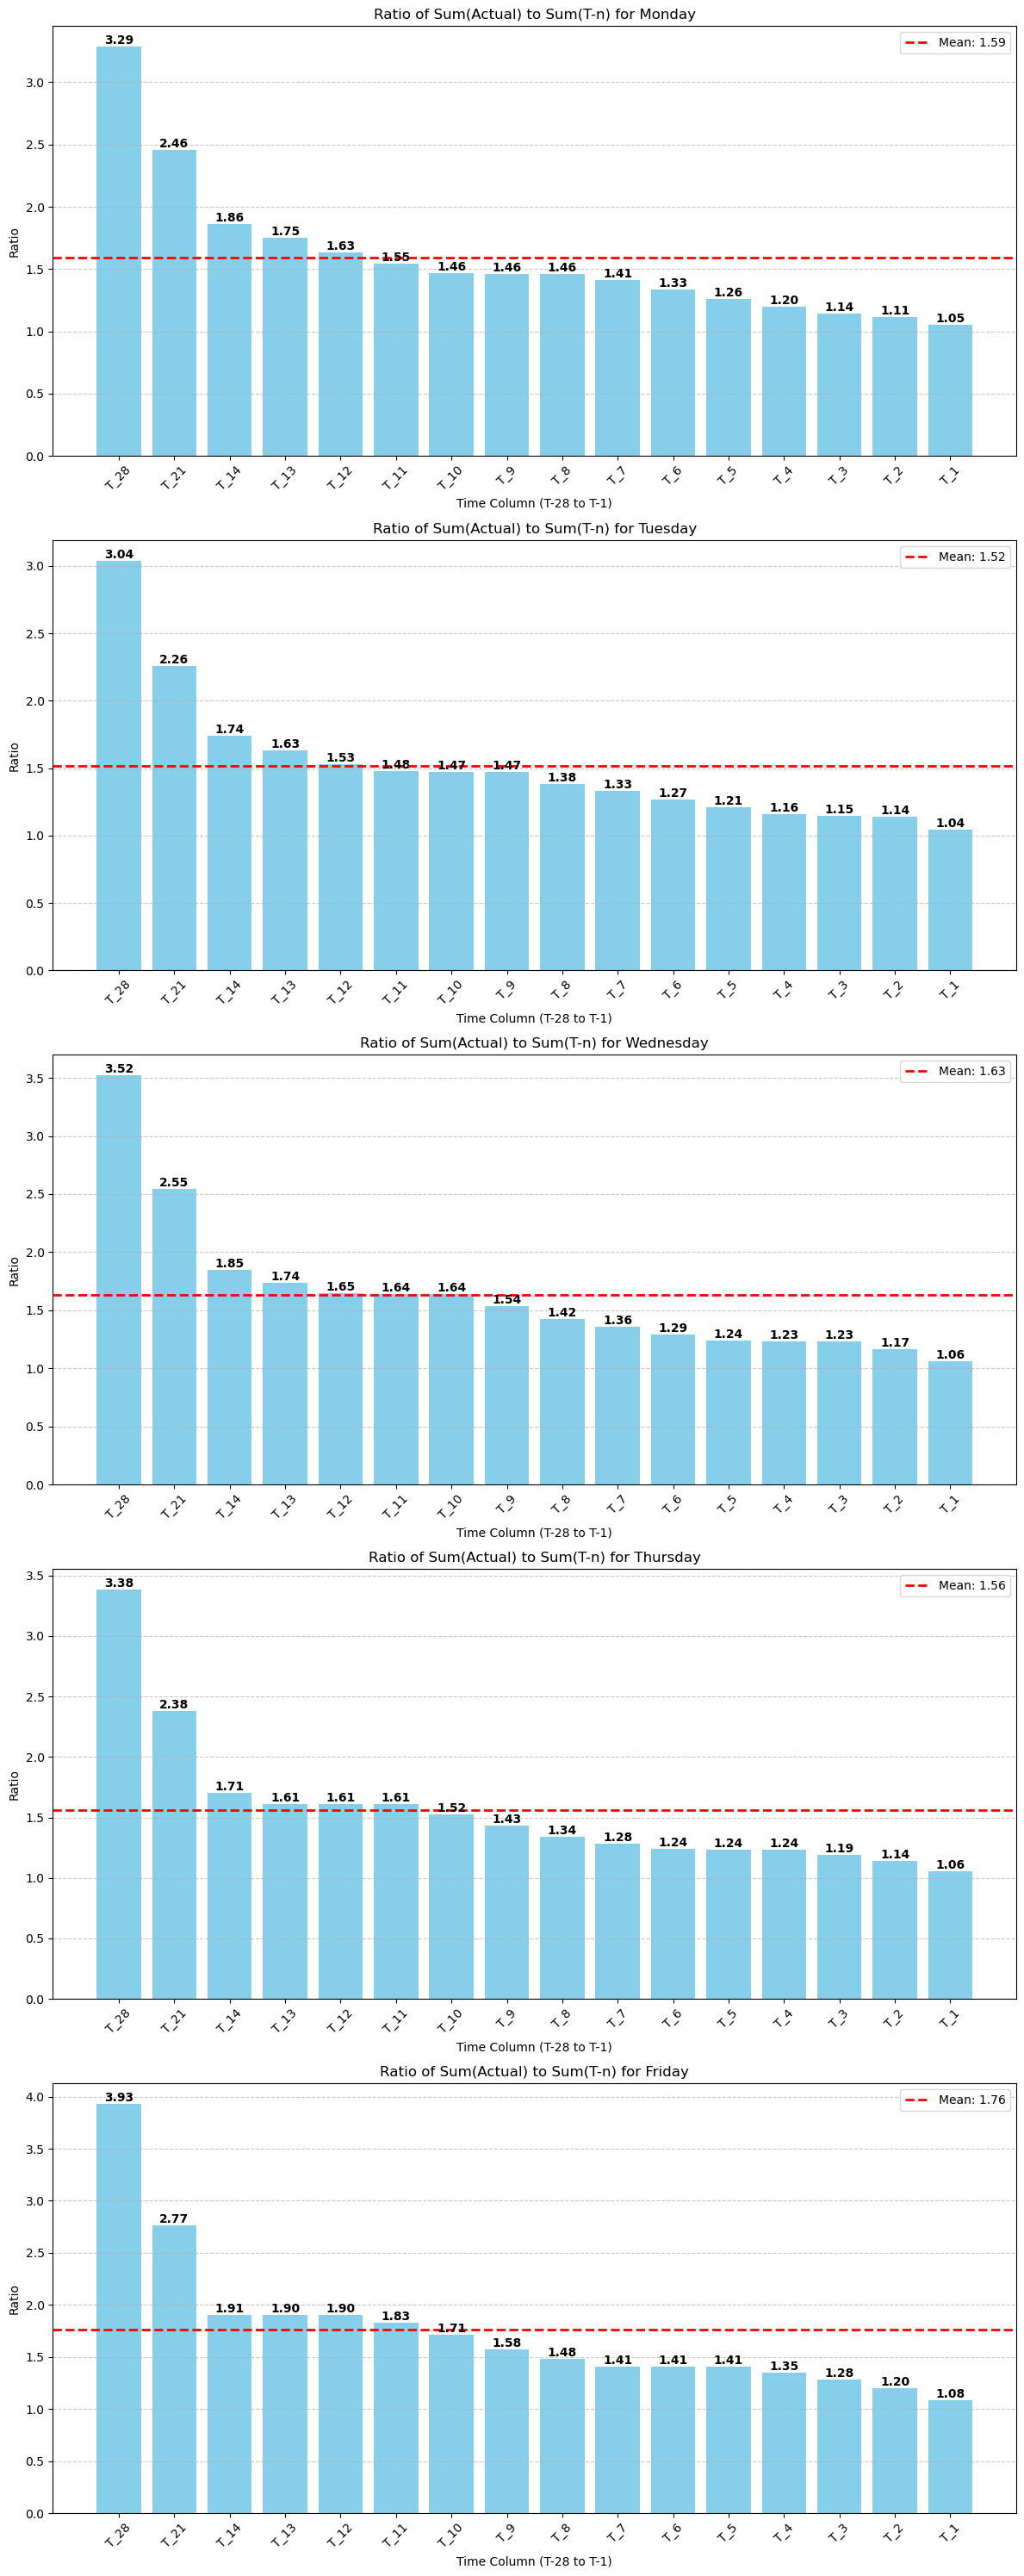

In [38]:
# =============================================================================
# Visualization 8: Ratio of Sum(Actual) to Sum(T-n) for Each Time Column by Weekday
# =============================================================================

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 30))
for i, day in enumerate(weekdays):
    df_day = df[df['DOW'] == day]
    # Compute ratios for each time column for the given day
    ratios = {col: df_day['Actual'].sum() / (df_day[col].sum() if df_day[col].sum() != 0 else 1) 
              for col in time_columns}
    ratios_df = pd.DataFrame(list(ratios.items()), columns=['Time Column', 'Ratio'])
    mean_ratio = ratios_df['Ratio'].mean()
    
    ax = axes[i]
    bars = ax.bar(ratios_df['Time Column'], ratios_df['Ratio'], color='skyblue')
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', 
                    fontsize=10, fontweight='bold')
    ax.axhline(mean_ratio, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_ratio:.2f}')
    ax.set_title(f'Ratio of Sum(Actual) to Sum(T-n) for {day}')
    ax.set_xlabel('Time Column (T-28 to T-1)')
    ax.set_ylabel('Ratio')
    ax.set_xticklabels(ratios_df['Time Column'], rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend()
plt.tight_layout()
plt.show()

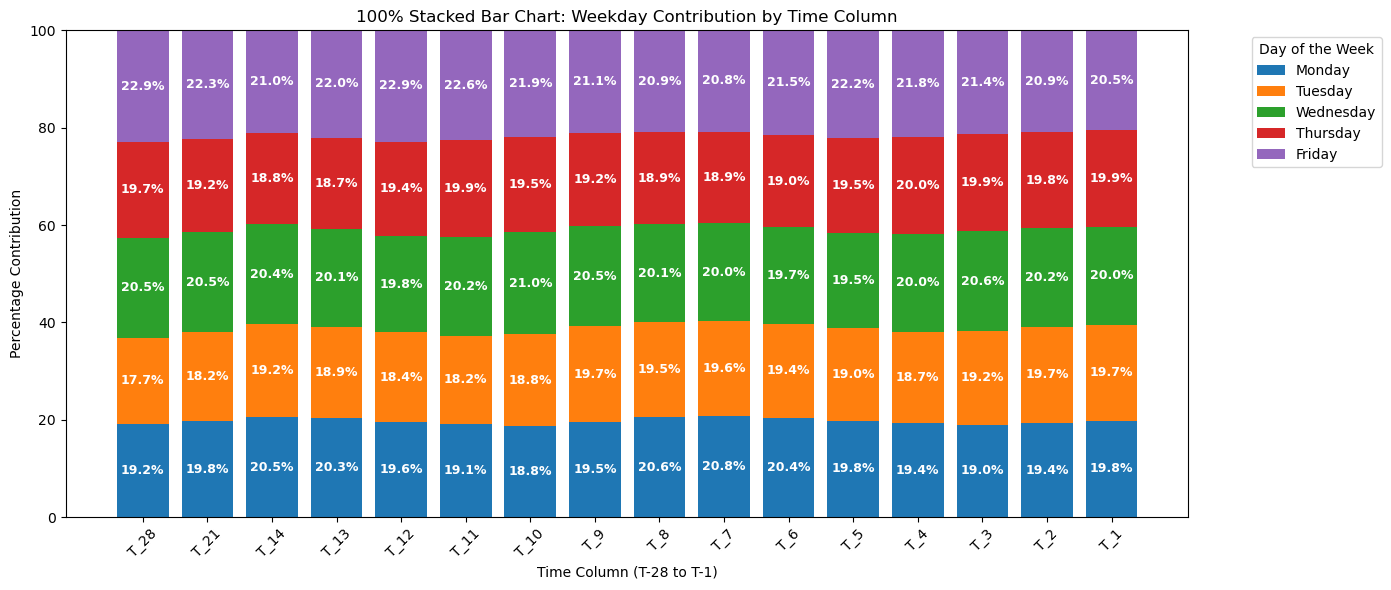

In [39]:
# =============================================================================
# Visualization 9: 100% Stacked Bar Chart of Weekday Contribution by Time Column
# =============================================================================

# Compute ratios for each time column grouped by weekday
ratios_dict = {col: [] for col in time_columns}
for col in time_columns:
    for day in weekdays:
        df_day = df[df['DOW'] == day]
        denominator = df_day[col].sum()
        ratio = df_day['Actual'].sum() / denominator if denominator != 0 else 0
        ratios_dict[col].append(ratio)

# Convert to NumPy array and normalize each time column to sum to 100%
ratios_array = np.array([ratios_dict[col] for col in time_columns]).T
column_sums = np.nansum(ratios_array, axis=0)
normalized_ratios = np.zeros_like(ratios_array)
non_zero_sums = column_sums != 0
normalized_ratios[:, non_zero_sums] = (ratios_array[:, non_zero_sums] / column_sums[non_zero_sums]) * 100

fig, ax = plt.subplots(figsize=(14, 6))
bottom = np.zeros(len(time_columns))
for i, day in enumerate(weekdays):
    bars = ax.bar(time_columns, normalized_ratios[i], bottom=bottom, label=day)
    # Add percentage labels if segment is sufficiently large
    for j, (bar, percentage) in enumerate(zip(bars, normalized_ratios[i])):
        if percentage > 5:
            y = bottom[j] + percentage / 2
            ax.text(bar.get_x() + bar.get_width()/2, y, f"{percentage:.1f}%", ha='center', va='center', 
                    fontsize=9, color='white', fontweight='bold')
    bottom += np.nan_to_num(normalized_ratios[i])
ax.set_xlabel("Time Column (T-28 to T-1)")
ax.set_ylabel("Percentage Contribution")
ax.set_title("100% Stacked Bar Chart: Weekday Contribution by Time Column")
ax.legend(title="Day of the Week", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

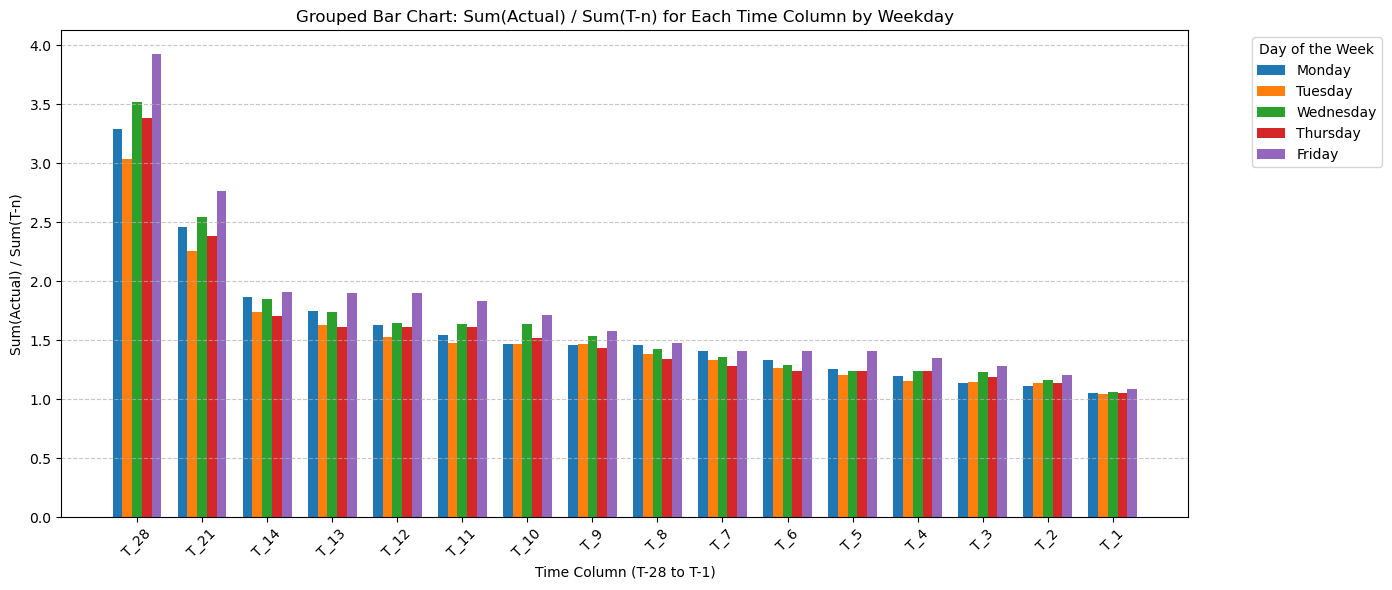

In [40]:
# =============================================================================
# Visualization 10: Grouped Bar Chart of Ratio by Weekday for Each Time Column
# =============================================================================

# Recompute ratios by weekday (as in previous steps)
ratios_dict = {col: [] for col in time_columns}
for col in time_columns:
    for day in weekdays:
        df_day = df[df['DOW'] == day]
        denominator = df_day[col].sum()
        ratio = df_day['Actual'].sum() / denominator if denominator != 0 else np.nan
        ratios_dict[col].append(ratio)
ratios_array = np.array([ratios_dict[col] for col in time_columns]).T  # Shape: (5, number of time columns)

fig, ax = plt.subplots(figsize=(14, 6))
bar_width = 0.15
x_indexes = np.arange(len(time_columns))
for i, day in enumerate(weekdays):
    ax.bar(x_indexes + i * bar_width, ratios_array[i], width=bar_width, label=day)
ax.set_xlabel("Time Column (T-28 to T-1)")
ax.set_ylabel("Sum(Actual) / Sum(T-n)")
ax.set_title("Grouped Bar Chart: Sum(Actual) / Sum(T-n) for Each Time Column by Weekday")
ax.legend(title="Day of the Week", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(x_indexes + bar_width * (len(weekdays)-1) / 2)
ax.set_xticklabels(time_columns, rotation=45)
plt.tight_layout()
plt.show()


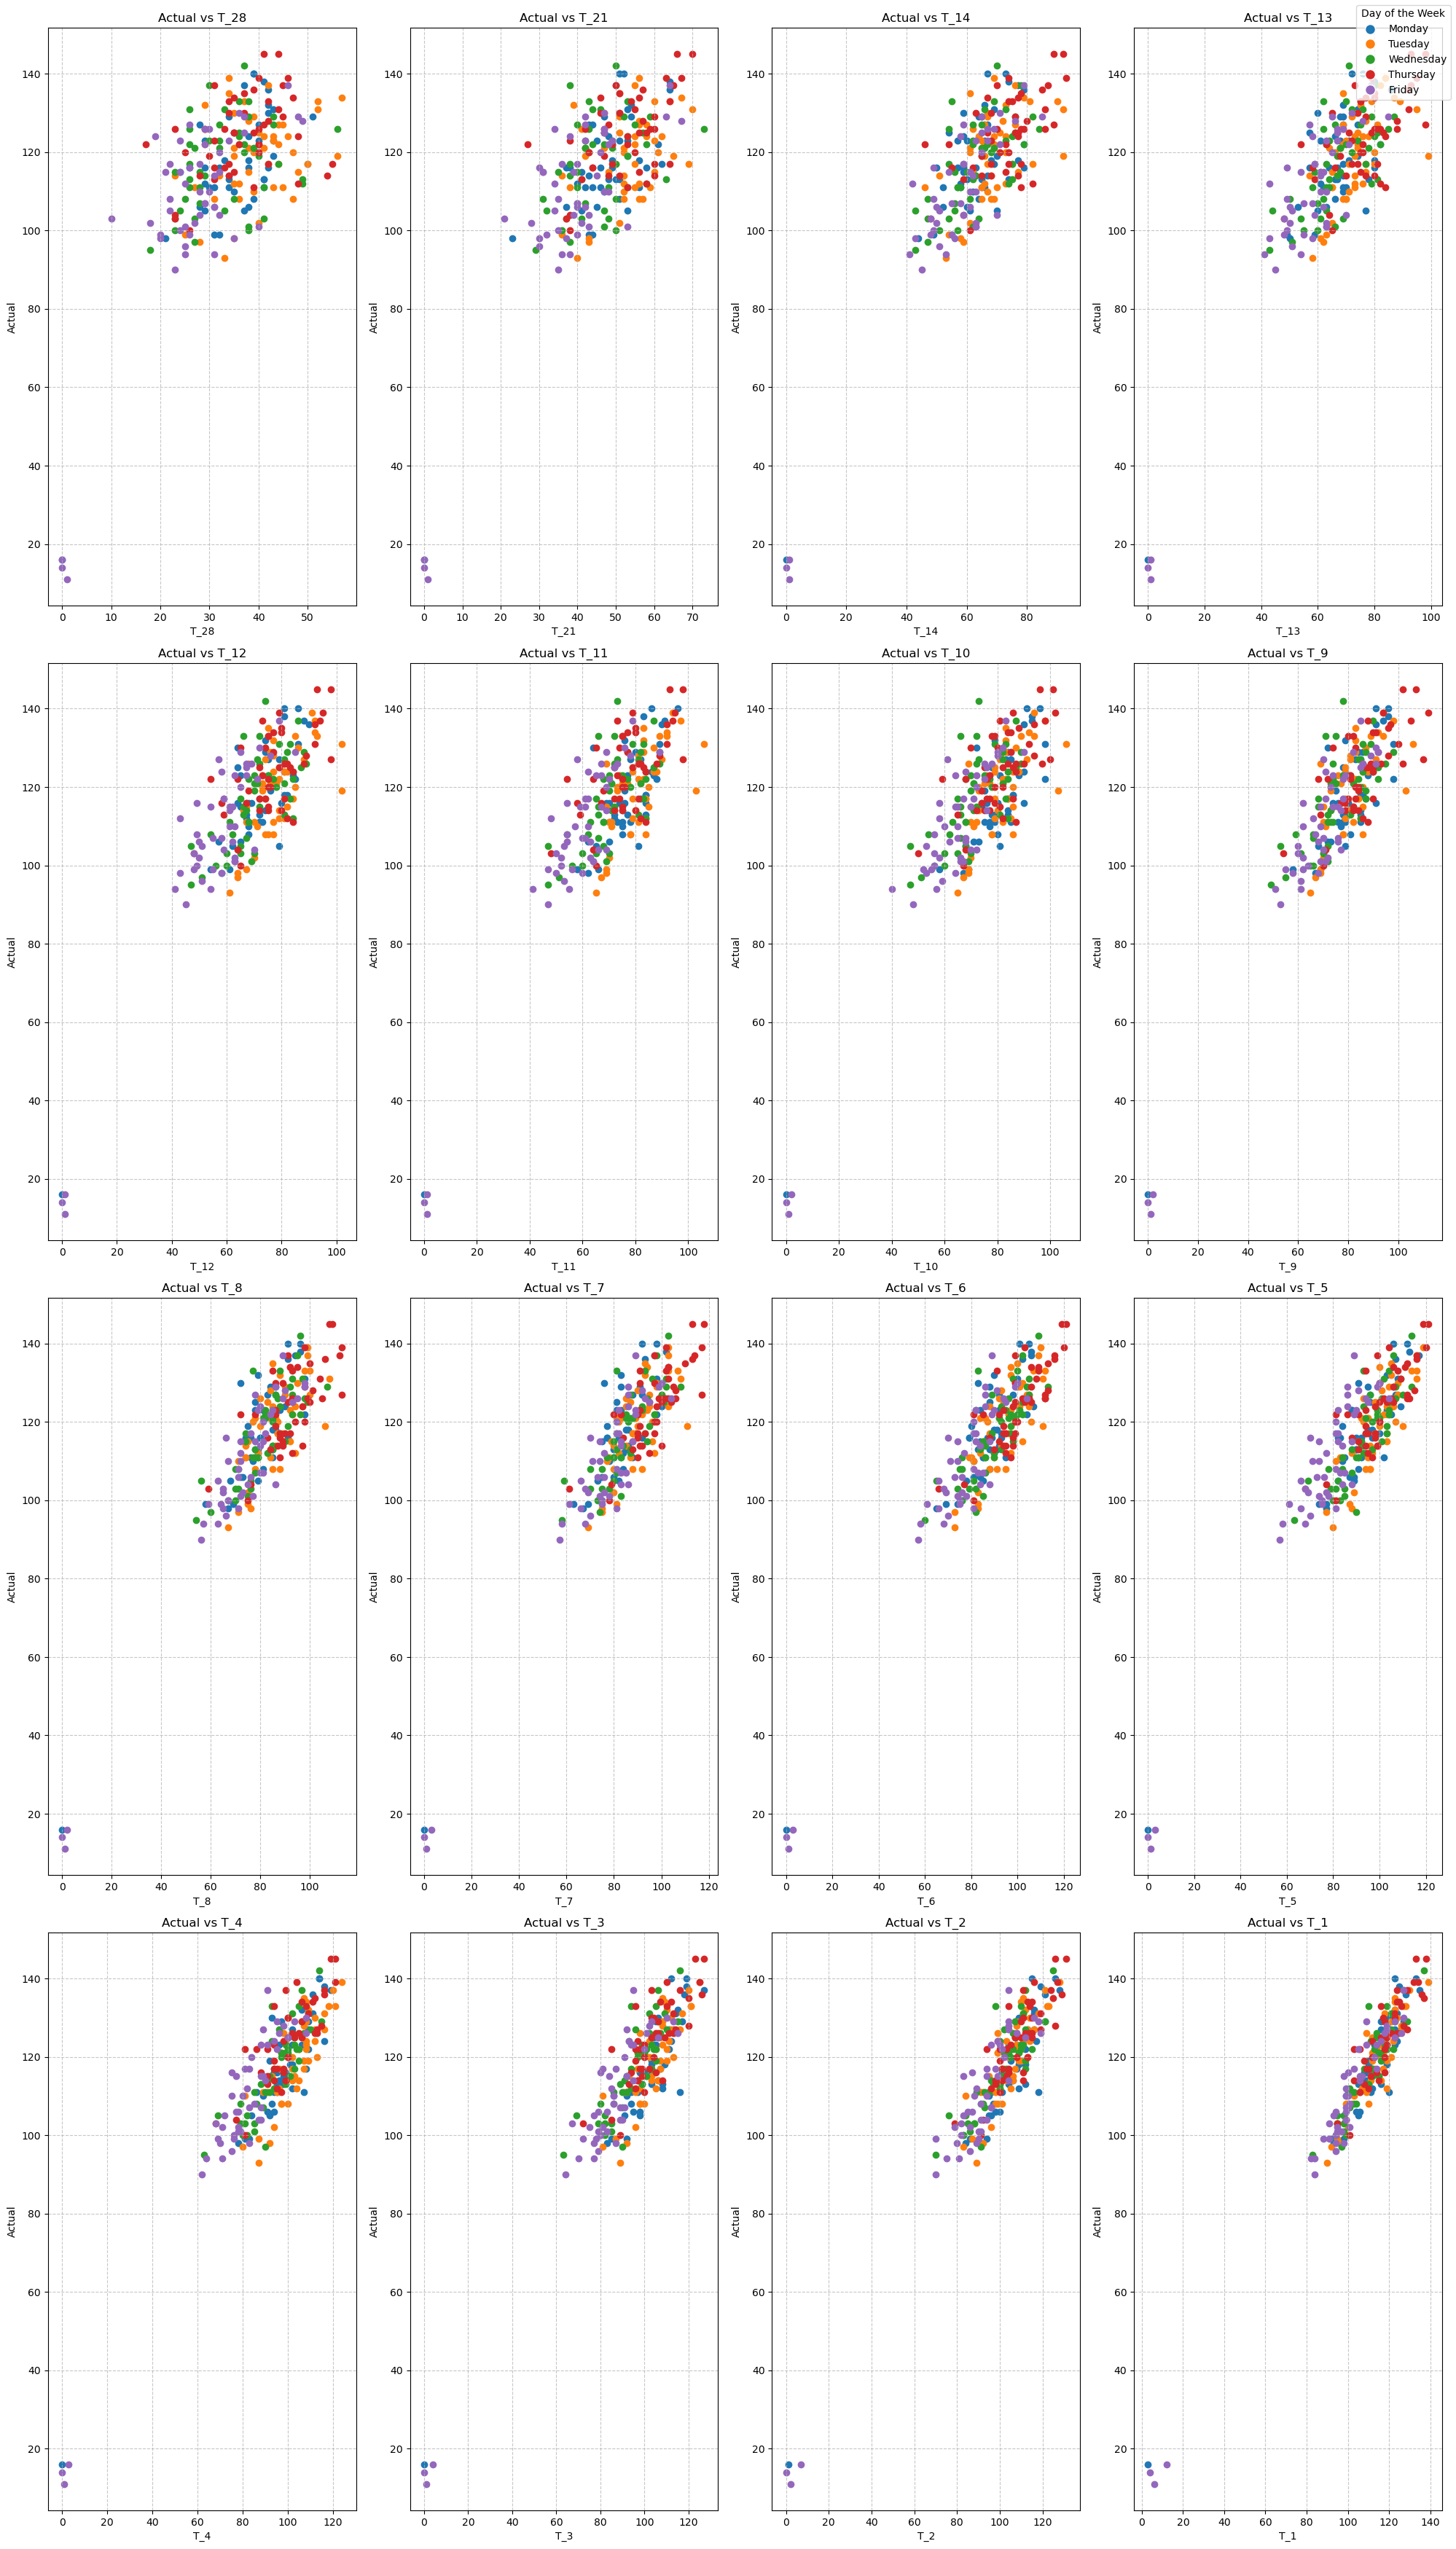

In [41]:

# =============================================================================
# Visualization 11: Scatter Plots of Actual vs. Each T-n Column Colored by DOW
# =============================================================================

# Define weekdays and assign colors using seaborn palette
colors = sns.color_palette("tab10", len(weekdays))
day_color_map = {day: colors[i] for i, day in enumerate(weekdays)}

# Create subplots for each T-n column
num_plots = len(time_columns)
cols = 4  # Number of subplot columns
rows = (num_plots + cols - 1) // cols  # Compute required rows

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 35))
axes = axes.flatten()

for i, col in enumerate(time_columns):
    ax = axes[i]
    for day in weekdays:
        subset = df[df["DOW"] == day]
        ax.scatter(subset[col], subset["Actual"], label=day, color=day_color_map[day])
    ax.set_title(f"Actual vs {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Actual")
    ax.grid(True, linestyle="--", alpha=0.7)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a single legend for all subplots
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=day_color_map[day],
                        markersize=10) for day in weekdays]
fig.legend(handles, weekdays, loc='upper right', title="Day of the Week")
plt.tight_layout()
plt.show()


In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# -----------------------------
# Step 1: Compute Cumulative Sum for Time Columns
# -----------------------------
# Define time-related columns in the desired order
time_cols = ["T_28", "T_21", "T_14", "T_13", "T_12", "T_11", "T_10", "T_9", 
             "T_8", "T_7", "T_6", "T_5", "T_4", "T_3", "T_2", "T_1"]

# Assuming df is already loaded
df[time_cols] = df[time_cols].cumsum(axis=1)

# -----------------------------
# Modeling: Linear Regression
# -----------------------------

# Define features (X) and target (y)
X = df.loc[:, "DOW":"T_1"]
y = df["Actual"]

# One-hot encode the 'DOW' column (drop first category to avoid dummy trap)
X = pd.get_dummies(X, columns=["DOW"], drop_first=True)

# Standardize numerical columns (those starting with 'T_')
num_cols = [col for col in X.columns if col.startswith("T_")]
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model using R² score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Compute Adjusted R²
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of predictors (features)

adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print Results
print(f"Sklearn Linear Regression R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adj_r2:.4f}")

# Print model parameters
print("\nSklearn Model Intercept:", model.intercept_)
print("\nSklearn Feature Coefficients:")
coefficients = sorted(zip(X.columns, model.coef_), key=lambda x: abs(x[1]), reverse=True)
for feature, coef in coefficients:
    print(f"{feature}: {coef:.4f}")


Sklearn Linear Regression R² Score: 0.8930
Adjusted R² Score: 0.8166

Sklearn Model Intercept: 116.35443379296292

Sklearn Feature Coefficients:
T_1: 203.2892
T_2: -149.6855
T_3: -56.3937
T_7: 42.6104
T_5: -34.8653
T_8: -32.8901
T_6: 24.9990
T_11: -20.8346
T_10: 17.1825
T_4: 15.8001
T_13: 11.1885
T_14: -8.1644
T_21: 3.5944
T_9: 2.8744
T_12: -1.5573
T_28: -1.3615
DOW_Wednesday: 1.3173
DOW_Monday: -0.6907
DOW_Thursday: -0.4216
DOW_Tuesday: 0.2058


In [69]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Step 1: Feature Selection
X = df.loc[:, "DOW":"T_1"]  # Select columns from DOW to T_1
y = df["Actual"]

X = pd.get_dummies(X, columns=["DOW"], drop_first=True)

# Step 3: Standardize Numerical Columns (those starting with "T_")
num_cols = [col for col in X.columns if col.startswith("T_")]
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


# 4a. Dummy × Numerical interactions:
dummy_cols = [col for col in X.columns if col.startswith("DOW_")]
dummy_num_interactions = {}
for dummy in dummy_cols:
    for num in num_cols:
        dummy_num_interactions[f'{dummy}_x_{num}'] = X[dummy] * X[num]

# 4b. Consecutive Numerical interactions (pairs):
# Sort numerical columns by the numeric part (assumes format "T_#")
num_cols_sorted = sorted(num_cols, key=lambda x: int(x.split('_')[1]), reverse=True)
num_pair_interactions = {}
for i in range(len(num_cols_sorted) - 1):
    col1 = num_cols_sorted[i]
    col2 = num_cols_sorted[i+1]
    num_pair_interactions[f'{col1}_x_{col2}'] = X[col1] * X[col2]

# 4c. Three consecutive numerical interactions (synergistic effects):
num_triplet_interactions = {}
for i in range(len(num_cols_sorted) - 2):
    col1 = num_cols_sorted[i]
    col2 = num_cols_sorted[i+1]
    col3 = num_cols_sorted[i+2]
    num_triplet_interactions[f'{col1}_x_{col2}_x_{col3}'] = X[col1] * X[col2] * X[col3]

# Convert interaction dictionaries to DataFrames
df_dummy_num = pd.DataFrame(dummy_num_interactions, index=X.index)
df_num_pairs = pd.DataFrame(num_pair_interactions, index=X.index)
df_num_triplets = pd.DataFrame(num_triplet_interactions, index=X.index)

# Combine all features: original X, dummy×numerical, pairs, and triplets
X_full = pd.concat([X, df_dummy_num, df_num_pairs, df_num_triplets], axis=1)

# Ensure all columns are numeric
X_full = X_full.astype(np.float64)
y = y.astype(np.float64)

# --------------------------------------------------------------------
# Step 5: Train-Test Split (80% train, 20% test)
# --------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

# --------------------------------------------------------------------
# Step 6: Fit the Full Regression Model using statsmodels OLS
# --------------------------------------------------------------------
X_train_sm = sm.add_constant(X_train)  # Add intercept term
X_train_sm = X_train_sm.astype(np.float64)
y_train = y_train.astype(np.float64)

full_model = sm.OLS(y_train, X_train_sm).fit()

# Print the full model summary, R² and Adjusted R²
print("FULL MODEL SUMMARY")
print(full_model.summary())
print("Full Model R-squared:", full_model.rsquared)
print("Full Model Adjusted R-squared:", full_model.rsquared_adj)

# --------------------------------------------------------------------
# Step 7: Extract Significant Variables and Fit Reduced Model
# --------------------------------------------------------------------
significance_threshold = 0.05
pvals = full_model.pvalues
signif_vars = pvals[pvals < significance_threshold].index.tolist()

print("\nSignificant Variables (p < 0.05):")
print(signif_vars)

# Create new training set with only significant variables (including the constant)
X_train_sig = X_train_sm[signif_vars]

# For the test set, add constant and subset to significant variables
X_test_sm = sm.add_constant(X_test)
X_test_sig = X_test_sm[signif_vars]

# Fit the reduced model using only significant variables
sig_model = sm.OLS(y_train, X_train_sig).fit()

# Print the summary and R² values for the reduced model
print("\nREDUCED MODEL (Significant Terms) SUMMARY")
print(sig_model.summary())
print("Reduced Model R-squared:", sig_model.rsquared)
print("Reduced Model Adjusted R-squared:", sig_model.rsquared_adj)


FULL MODEL SUMMARY
                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     26.10
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           5.04e-38
Time:                        13:49:05   Log-Likelihood:                -479.48
No. Observations:                 192   AIC:                             1179.
Df Residuals:                      82   BIC:                             1537.
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const        

In [71]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define X (only T_1) and y (Actual)
X = df[["T_1"]]
y = df["Actual"]

# Standardize T_1
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a constant for the intercept
X = sm.add_constant(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the OLS model
model = sm.OLS(y_train, X_train).fit()

# Print full model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     2798.
Date:                Fri, 07 Mar 2025   Prob (F-statistic):          1.24e-115
Time:                        14:06:43   Log-Likelihood:                -558.17
No. Observations:                 192   AIC:                             1120.
Df Residuals:                     190   BIC:                             1127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.4436      0.321    362.377      0.0

In [23]:

# -----------------------------
# Modeling Part B: Linear Regression using Statsmodels with Interaction Terms
# -----------------------------

# Reset X and y for full feature engineering
X = df.loc[:, "DOW":"T_1"]
y = df["Actual"]

# One-hot encode 'DOW'
X = pd.get_dummies(X, columns=["DOW"], drop_first=True)

# Standardize numerical columns
num_cols = [col for col in X.columns if col.startswith("T_")]
X[num_cols] = scaler.fit_transform(X[num_cols])

# Create interaction terms between dummy variables and numerical columns
dummy_cols = [col for col in X.columns if col.startswith("DOW_")]
dummy_num_interactions = {}
for dummy in dummy_cols:
    for num in num_cols:
        interaction_name = f'{dummy}_x_{num}'
        dummy_num_interactions[interaction_name] = X[dummy] * X[num]

# Create interactions between consecutive numerical columns (sorted in descending order by time)
num_cols_sorted = sorted(num_cols, key=lambda x: int(x.split('_')[1]), reverse=True)
num_pair_interactions = {}
for i in range(len(num_cols_sorted) - 1):
    col1 = num_cols_sorted[i]
    col2 = num_cols_sorted[i+1]
    interaction_name = f'{col1}_x_{col2}'
    num_pair_interactions[interaction_name] = X[col1] * X[col2]

# Convert the interaction dictionaries into DataFrames
df_dummy_num = pd.DataFrame(dummy_num_interactions, index=X.index)
df_num_pairs = pd.DataFrame(num_pair_interactions, index=X.index)

# Combine original features with the interaction features
X_full = pd.concat([X, df_dummy_num, df_num_pairs], axis=1)

# Ensure all features are numeric and cast target as float
X_full = X_full.apply(pd.to_numeric)
y = y.astype(float)

# Split the data into training and testing sets
X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

# Add a constant term for the statsmodels OLS model
X_train_sm = sm.add_constant(X_train_full).astype(np.float64)
y_train = y_train.astype(np.float64)

# Fit the OLS model and display the summary
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     30.58
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           8.89e-46
Time:                        12:05:08   Log-Likelihood:                -492.20
No. Observations:                 192   AIC:                             1176.
Df Residuals:                      96   BIC:                             1489.
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.6485 

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

def run_model(df, drop_columns, model_name):
    # Drop specified columns (ignore errors if a column is not present)
    df = df.drop(columns=drop_columns, errors='ignore')
    
    # Step 1: Feature Selection
    # Assumes features from "DOW" up to the second-to-last column (with "Actual" being the last column)
    X = df.loc[:, "DOW":df.columns[-2]]
    y = df["Actual"]
    
    # Step 2: One-Hot Encode "DOW"
    X = pd.get_dummies(X, columns=["DOW"], drop_first=True)
    
    # Step 3: Standardize Numerical Columns (those starting with "T_")
    num_cols = [col for col in X.columns if col.startswith("T_")]
    scaler = StandardScaler()
    X[num_cols] = scaler.fit_transform(X[num_cols])
    
    # Step 4: Create Interaction Terms
    # 4a. Dummy × Numerical interactions:
    dummy_cols = [col for col in X.columns if col.startswith("DOW_")]
    dummy_num_interactions = {
        f'{dummy}_x_{num}': X[dummy] * X[num] 
        for dummy in dummy_cols for num in num_cols
    }
    
    # 4b. Consecutive Numerical interactions:
    num_cols_sorted = sorted(num_cols, key=lambda x: int(x.split('_')[1]), reverse=True)
    num_pair_interactions = {
        f'{num_cols_sorted[i]}_x_{num_cols_sorted[i+1]}': X[num_cols_sorted[i]] * X[num_cols_sorted[i+1]]
        for i in range(len(num_cols_sorted)-1)
    }
    
    # Concatenate the interaction DataFrames with X
    df_dummy_num = pd.DataFrame(dummy_num_interactions, index=X.index)
    df_num_pairs = pd.DataFrame(num_pair_interactions, index=X.index)
    X_full = pd.concat([X, df_dummy_num, df_num_pairs], axis=1).astype(np.float64)
    y = y.astype(np.float64)
    
    # Step 5: Train-Test Split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)
    
    # Step 6: Fit the Full Regression Model
    X_train_sm = sm.add_constant(X_train).astype(np.float64)
    full_model = sm.OLS(y_train, X_train_sm).fit()
    
    return {
        "Model": model_name,
        "Dropped Columns": drop_columns,
        "Full Model": full_model
    }

# Assume df is your DataFrame, for example:
# df = pd.read_csv("hospital.csv")

# Define the list of columns to drop for each model
columns_to_drop_list = [
    [], 
    ["T_1"], 
    ["T_1", "T_2"], 
    ["T_1", "T_2", "T_3"], 
    ["T_1", "T_2", "T_3", "T_4"], 
    ["T_1", "T_2", "T_3", "T_4", "T_5"], 
    ["T_1", "T_2", "T_3", "T_4", "T_5", "T_6"], 
    ["T_1", "T_2", "T_3", "T_4", "T_5", "T_6", "T_7"]
]

# Run all models and store the results
models_summary = []
for i, drop_cols in enumerate(columns_to_drop_list):
    model_name = f"Model_{i+1}"
    models_summary.append(run_model(df.copy(), drop_cols, model_name))

# Print the complete summary for each full model
for summary in models_summary:
    print("\n" + "=" * 80)
    print(f"{summary['Model']} (Dropped Columns: {summary['Dropped Columns']})\n")
    print(summary["Full Model"].summary())
    print("=" * 80)



Model_1 (Dropped Columns: [])

                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     30.58
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           8.89e-46
Time:                        00:25:54   Log-Likelihood:                -492.20
No. Observations:                 192   AIC:                             1176.
Df Residuals:                      96   BIC:                             1489.
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------



----------------------------------------
Model_1
Dropped Columns: []
Full Model R²: 0.9680
Full Model Adjusted R²: 0.9364

----------------------------------------
Model_2
Dropped Columns: ['T_1']
Full Model R²: 0.9463
Full Model Adjusted R²: 0.8995

----------------------------------------
Model_3
Dropped Columns: ['T_1', 'T_2']
Full Model R²: 0.9331
Full Model Adjusted R²: 0.8817

----------------------------------------
Model_4
Dropped Columns: ['T_1', 'T_2', 'T_3']
Full Model R²: 0.9289
Full Model Adjusted R²: 0.8810

----------------------------------------
Model_5
Dropped Columns: ['T_1', 'T_2', 'T_3', 'T_4']
Full Model R²: 0.9231
Full Model Adjusted R²: 0.8776

----------------------------------------
Model_6
Dropped Columns: ['T_1', 'T_2', 'T_3', 'T_4', 'T_5']
Full Model R²: 0.9142
Full Model Adjusted R²: 0.8700

----------------------------------------
Model_7
Dropped Columns: ['T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6']
Full Model R²: 0.9073
Full Model Adjusted R²: 0.8658

---

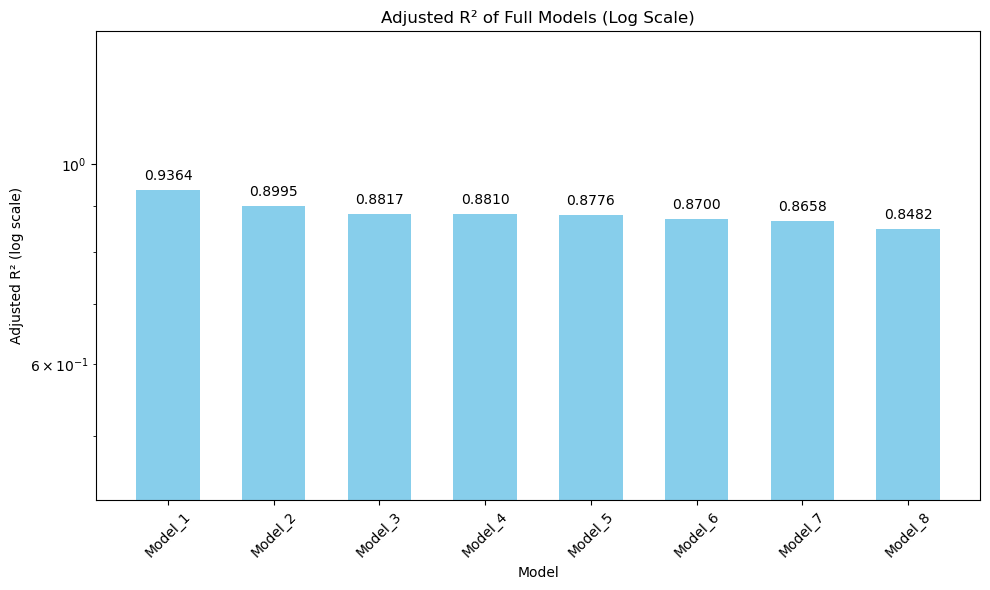

In [19]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt

def run_model(df, drop_columns, model_name):
    # Drop specified columns (ignore errors if column is not present)
    df = df.drop(columns=drop_columns, errors='ignore')
    
    # Step 1: Feature Selection
    X = df.loc[:, "DOW":df.columns[-2]]
    y = df["Actual"]
    
    # Step 2: One-Hot Encode "DOW"
    X = pd.get_dummies(X, columns=["DOW"], drop_first=True)
    
    # Step 3: Standardize Numerical Columns (those starting with "T_")
    num_cols = [col for col in X.columns if col.startswith("T_")]
    scaler = StandardScaler()
    X[num_cols] = scaler.fit_transform(X[num_cols])
    
    # Step 4: Create Interaction Terms
    dummy_cols = [col for col in X.columns if col.startswith("DOW_")]
    dummy_num_interactions = {f'{dummy}_x_{num}': X[dummy] * X[num] 
                              for dummy in dummy_cols for num in num_cols}

    num_cols_sorted = sorted(num_cols, key=lambda x: int(x.split('_')[1]), reverse=True)
    num_pair_interactions = {f'{num_cols_sorted[i]}_x_{num_cols_sorted[i+1]}': 
                             X[num_cols_sorted[i]] * X[num_cols_sorted[i+1]] 
                             for i in range(len(num_cols_sorted)-1)}
    
    df_dummy_num = pd.DataFrame(dummy_num_interactions, index=X.index)
    df_num_pairs = pd.DataFrame(num_pair_interactions, index=X.index)
    
    X_full = pd.concat([X, df_dummy_num, df_num_pairs], axis=1).astype(np.float64)
    y = y.astype(np.float64)
    
    # Step 5: Train-Test Split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)
    
    # Step 6: Fit the Full Regression Model using statsmodels OLS
    X_train_sm = sm.add_constant(X_train).astype(np.float64)
    try:
        full_model = sm.OLS(y_train, X_train_sm).fit()
        r2 = full_model.rsquared
        adj_r2 = full_model.rsquared_adj
        summary_text = full_model.summary().as_text()
    except Exception as e:
        r2, adj_r2, summary_text = np.nan, np.nan, f"Error: {str(e)}"
    
    return {
        "Model": model_name,
        "Dropped Columns": drop_columns,
        "Full Model R²": r2,
        "Full Model Adjusted R²": adj_r2,
        "Full Model Summary": summary_text
    }

# Load your DataFrame (ensure df is defined)
# Example: df = pd.read_csv("hospital.csv")

models_summary = []
columns_to_drop_list = [
    [], 
    ["T_1"], 
    ["T_1", "T_2"], 
    ["T_1", "T_2", "T_3"], 
    ["T_1", "T_2", "T_3", "T_4"], 
    ["T_1", "T_2", "T_3", "T_4", "T_5"], 
    ["T_1", "T_2", "T_3", "T_4", "T_5", "T_6"], 
    ["T_1", "T_2", "T_3", "T_4", "T_5", "T_6", "T_7"]
]

for i, drop_cols in enumerate(columns_to_drop_list):
    model_name = f"Model_{i+1}"
    models_summary.append(run_model(df.copy(), drop_cols, model_name))

# Print Summary of All Models
for summary in models_summary:
    print(f"\n{'-'*40}\n{summary['Model']}")
    print(f"Dropped Columns: {summary['Dropped Columns']}")
    print(f"Full Model R²: {summary['Full Model R²']:.4f}")
    print(f"Full Model Adjusted R²: {summary['Full Model Adjusted R²']:.4f}")

# --------------------------------------------------------------------
# Plot Adjusted R² (Full Model) on a Logarithmic Scale
# --------------------------------------------------------------------
# Debugging: Print available keys
for i, summary in enumerate(models_summary):
    print(f"Keys in {summary['Model']}: {list(summary.keys())}")

# Extract Adjusted R² safely (use np.nan for missing values)
models = [summary["Model"] for summary in models_summary]
full_adj_r2 = [summary.get("Full Model Adjusted R²", np.nan) for summary in models_summary]

x = np.arange(len(models))
width = 0.6

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(x, full_adj_r2, width, color='skyblue')
ax.set_xlabel("Model")
ax.set_ylabel("Adjusted R² (log scale)")
ax.set_title("Adjusted R² of Full Models (Log Scale)")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)

# Set y-axis to logarithmic scale (handle zero values)
min_val = min(filter(lambda v: v > 0, full_adj_r2), default=0.001)
max_val = max(full_adj_r2, default=1)
ax.set_yscale("log")
ax.set_ylim([min_val * 0.5, max_val * 1.5])

# Add text labels on top of each bar
for bar in bars:
    height = bar.get_height()
    if not np.isnan(height) and height > 0:  # Avoid NaN labels
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5),  # Vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

def run_model(df, drop_columns, model_name):
    # Drop specified columns (ignore errors if a column is not present)
    df = df.drop(columns=drop_columns, errors='ignore')
    
    # Step 1: Feature Selection
    X = df.loc[:, "DOW":df.columns[-2]]  # Features from "DOW" to second-to-last column
    y = df["Actual"]
    
    # Step 2: One-Hot Encode "DOW"
    X = pd.get_dummies(X, columns=["DOW"], drop_first=True)
    
    # Step 3: Standardize Numerical Columns (those starting with "T_")
    num_cols = [col for col in X.columns if col.startswith("T_")]
    scaler = StandardScaler()
    X[num_cols] = scaler.fit_transform(X[num_cols])
    
    # Step 4: Create Interaction Terms
    dummy_cols = [col for col in X.columns if col.startswith("DOW_")]
    dummy_num_interactions = {
        f'{dummy}_x_{num}': X[dummy] * X[num] 
        for dummy in dummy_cols for num in num_cols
    }
    
    num_cols_sorted = sorted(num_cols, key=lambda x: int(x.split('_')[1]), reverse=True)
    num_pair_interactions = {
        f'{num_cols_sorted[i]}_x_{num_cols_sorted[i+1]}': X[num_cols_sorted[i]] * X[num_cols_sorted[i+1]]
        for i in range(len(num_cols_sorted)-1)
    }
    
    # Concatenate the interaction DataFrames with X
    df_dummy_num = pd.DataFrame(dummy_num_interactions, index=X.index)
    df_num_pairs = pd.DataFrame(num_pair_interactions, index=X.index)
    X_full = pd.concat([X, df_dummy_num, df_num_pairs], axis=1).astype(np.float64)
    y = y.astype(np.float64)
    
    # Step 5: Train-Test Split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)
    
    # Step 6: Fit the Full Regression Model
    X_train_sm = sm.add_constant(X_train).astype(np.float64)
    full_model = sm.OLS(y_train, X_train_sm).fit()
    
    return {
        "Model": model_name,
        "Dropped Columns": drop_columns,
        "Full Model": full_model
    }

# Run Model 8 (drop "T_1" to "T_7")
drop_columns = ["T_1", "T_2", "T_3", "T_4", "T_5", "T_6", "T_7"]
model_8_summary = run_model(df.copy(), drop_columns, "Model_8")

# Print the summary for Model 8
print("\n" + "=" * 80)
print(f"{model_8_summary['Model']} (Dropped Columns: {model_8_summary['Dropped Columns']})\n")
print(model_8_summary["Full Model"].summary())
print("=" * 80)



Model_8 (Dropped Columns: ['T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7'])

                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     20.96
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           4.10e-45
Time:                        14:34:48   Log-Likelihood:                -611.23
No. Observations:                 192   AIC:                             1330.
Df Residuals:                     138   BIC:                             1506.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

def run_model(df, drop_columns, model_name):
    # Drop specified columns (ignore errors if a column is not present)
    df = df.drop(columns=drop_columns, errors='ignore')
    
    # Step 1: Feature Selection
    X = df.loc[:, "DOW":df.columns[-2]]  # Features from "DOW" to second-to-last column
    y = df["Actual"]
    
    # Step 2: One-Hot Encode "DOW"
    X = pd.get_dummies(X, columns=["DOW"], drop_first=True)
    
    # Step 3: Standardize Numerical Columns (those starting with "T_")
    num_cols = [col for col in X.columns if col.startswith("T_")]
    scaler = StandardScaler()
    X[num_cols] = scaler.fit_transform(X[num_cols])
    
    # Step 4: Create Interaction Terms
    dummy_cols = [col for col in X.columns if col.startswith("DOW_")]
    dummy_num_interactions = {
        f'{dummy}_x_{num}': X[dummy] * X[num] 
        for dummy in dummy_cols for num in num_cols
    }
    
    num_cols_sorted = sorted(num_cols, key=lambda x: int(x.split('_')[1]), reverse=True)
    num_pair_interactions = {
        f'{num_cols_sorted[i]}_x_{num_cols_sorted[i+1]}': X[num_cols_sorted[i]] * X[num_cols_sorted[i+1]]
        for i in range(len(num_cols_sorted)-1)
    }
    
    # Concatenate the interaction DataFrames with X
    df_dummy_num = pd.DataFrame(dummy_num_interactions, index=X.index)
    df_num_pairs = pd.DataFrame(num_pair_interactions, index=X.index)
    X_full = pd.concat([X, df_dummy_num, df_num_pairs], axis=1).astype(np.float64)
    y = y.astype(np.float64)
    
    # Step 5: Train-Test Split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)
    
    # Step 6: Fit the Full Regression Model
    X_train_sm = sm.add_constant(X_train).astype(np.float64)
    full_model = sm.OLS(y_train, X_train_sm).fit()
    
    return {
        "Model": model_name,
        "Dropped Columns": drop_columns,
        "Full Model": full_model,
        "X_train": X_train,  # Store X_train for filtering
        "y_train": y_train
    }

# Run Model 8
drop_columns = ["T_1", "T_2", "T_3", "T_4", "T_5", "T_6", "T_7"]
model_8_summary = run_model(df.copy(), drop_columns, "Model_8")

# Extract significant features (p < 0.05)
significant_features = model_8_summary["Full Model"].pvalues[model_8_summary["Full Model"].pvalues < 0.05].index
significant_features = [col for col in significant_features if col != "const"]  # Exclude constant

# Train new model with only significant features
X_train_sig = model_8_summary["X_train"][significant_features]
X_train_sig = sm.add_constant(X_train_sig).astype(np.float64)
y_train = model_8_summary["y_train"]

# Fit new model
new_model = sm.OLS(y_train, X_train_sig).fit()

# Print the summary of the new model
print("\n" + "=" * 80)
print("New Model with Only Significant Features\n")
print(new_model.summary())
print("=" * 80)



New Model with Only Significant Features

                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 07 Mar 2025   Prob (F-statistic):                nan
Time:                        14:36:04   Log-Likelihood:                -822.69
No. Observations:                 192   AIC:                             1647.
Df Residuals:                     191   BIC:                             1651.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from itertools import combinations  # For generating combinations of terms

def run_model(df, drop_columns, model_name):
    # Drop specified columns
    df = df.drop(columns=drop_columns, errors='ignore')
    
    # Step 1: Feature Selection
    X = df.loc[:, "DOW":df.columns[-2]]  # Features from "DOW" to second-to-last column
    y = df["Actual"]
    
    # Step 2: One-Hot Encode "DOW"
    X = pd.get_dummies(X, columns=["DOW"], drop_first=True)
    
    # Step 3: Standardize Numerical Columns (T_*)
    num_cols = [col for col in X.columns if col.startswith("T_")]
    scaler = StandardScaler()
    X[num_cols] = scaler.fit_transform(X[num_cols])
    
    # Step 4: Create Combination Terms
    
    ## 4a. Dummy × Numerical interactions:
    dummy_cols = [col for col in X.columns if col.startswith("DOW_")]
    dummy_num_interactions = {
        f'{dummy}_x_{num}': X[dummy] * X[num] 
        for dummy in dummy_cols for num in num_cols
    }
    
    ## 4b. Pairwise Numerical interactions (T_i × T_j for i ≠ j):
    num_combinations = {
        f'{a}_x_{b}': X[a] * X[b] 
        for a, b in combinations(num_cols, 2)  # Generates all (T_i, T_j) pairs
    }
    
    # Concatenate interaction DataFrames with X
    df_dummy_num = pd.DataFrame(dummy_num_interactions, index=X.index)
    df_num_combos = pd.DataFrame(num_combinations, index=X.index)
    X_full = pd.concat([X, df_dummy_num, df_num_combos], axis=1).astype(np.float64)
    y = y.astype(np.float64)
    
    # Step 5: Train-Test Split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)
    
    # Step 6: Fit the Full Regression Model
    X_train_sm = sm.add_constant(X_train).astype(np.float64)
    full_model = sm.OLS(y_train, X_train_sm).fit()
    
    return {
        "Model": model_name,
        "Dropped Columns": drop_columns,
        "Full Model": full_model
    }

# Run Model 8 (drop "T_1" to "T_7")
drop_columns = ["T_1", "T_2", "T_3", "T_4", "T_5", "T_6", "T_7"]
model_8_summary = run_model(df.copy(), drop_columns, "Model_8")

# Print the summary for Model 8
print("\n" + "=" * 80)
print(f"{model_8_summary['Model']} (Dropped Columns: {model_8_summary['Dropped Columns']})\n")
print(model_8_summary["Full Model"].summary())
print("=" * 80)



Model_8 (Dropped Columns: ['T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7'])

                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     15.54
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           1.54e-35
Time:                        14:49:52   Log-Likelihood:                -580.68
No. Observations:                 192   AIC:                             1325.
Df Residuals:                     110   BIC:                             1592.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

def run_model(df, drop_columns, model_name):
    # Drop specified columns
    df = df.drop(columns=drop_columns, errors='ignore')
    
    # Step 1: Feature Selection
    X = df.loc[:, "DOW":df.columns[-2]]  # Features from "DOW" to second-to-last column
    y = df["Actual"]
    
    # Step 2: One-Hot Encode "DOW"
    X = pd.get_dummies(X, columns=["DOW"], drop_first=True)
    
    # Step 3: Standardize Numerical Columns (T_*)
    num_cols = [col for col in X.columns if col.startswith("T_")]
    scaler = StandardScaler()
    X[num_cols] = scaler.fit_transform(X[num_cols])
    
    # Step 4: Train-Test Split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Step 5: Fit the Regression Model
    X_train_sm = sm.add_constant(X_train).astype(np.float64)
    full_model = sm.OLS(y_train, X_train_sm).fit()
    
    return {
        "Model": model_name,
        "Dropped Columns": drop_columns,
        "Full Model": full_model
    }

# Run Model 8 (drop "T_1" to "T_7")
drop_columns = ["T_1", "T_2", "T_3", "T_4", "T_5", "T_6", "T_7"]
model_8_summary = run_model(df.copy(), drop_columns, "Model_8")

# Print the summary for Model 8
print("\n" + "=" * 80)
print(f"{model_8_summary['Model']} (Dropped Columns: {model_8_summary['Dropped Columns']})\n")
print(model_8_summary["Full Model"].summary())
print("=" * 80)



Model_8 (Dropped Columns: ['T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7'])

                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     64.88
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           2.30e-60
Time:                        14:51:43   Log-Likelihood:                -654.96
No. Observations:                 192   AIC:                             1338.
Df Residuals:                     178   BIC:                             1384.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [27]:
# =============================================================================
# SECTION 1: Data Preparation and Feature Engineering for the Full Model
# =============================================================================
# --- Feature Selection ---
# Select all columns from "DOW" to "T_1" as features and "Actual" as target.
X = df.loc[:, "DOW":"T_1"]
y = df["Actual"]

# --- One-Hot Encode "DOW" ---
# Drop the first category to avoid the dummy variable trap.
X = pd.get_dummies(X, columns=["DOW"], drop_first=True)

# --- Standardize Numerical Columns ---
# Identify columns that start with "T_" and standardize them.
num_cols = [col for col in X.columns if col.startswith("T_")]
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# --- Create Interaction Terms for Consecutive T_ Variables ---
# We create interactions for groups of 4 to 16 consecutive variables.
# First, sort the T_ columns in descending order by the numeric suffix.
num_cols_sorted = sorted(num_cols, key=lambda x: int(x.split('_')[1]), reverse=True)
interaction_terms = {}

# Loop over group sizes k (from 4 to 16)
for k in range(4, 17):
    # For each group of k consecutive columns, create an interaction term
    for i in range(len(num_cols_sorted) - k + 1):
        cols = num_cols_sorted[i:i+k]
        interaction_name = '_x_'.join(cols)
        # Multiply the values across the selected columns row-wise
        interaction_terms[interaction_name] = X[cols].prod(axis=1)

# Convert the interaction dictionary into a DataFrame and merge it with X
interaction_df = pd.DataFrame(interaction_terms, index=X.index)
X_full = pd.concat([X, interaction_df], axis=1)

# Ensure all features and the target are numeric
X_full = X_full.astype(np.float64)
y = y.astype(np.float64)

# --- Train-Test Split ---
# Split the data into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

# =============================================================================
# SECTION 2: Full Model Fitting using statsmodels OLS
# =============================================================================
# Add a constant term to include the intercept in the model.
X_train_sm = sm.add_constant(X_train)

# Fit the full regression model
full_model = sm.OLS(y_train, X_train_sm).fit()

# Display the full model summary and R² metrics.
print("FULL MODEL SUMMARY:")
print(full_model.summary())
print("Full Model R-squared:", full_model.rsquared)
print("Full Model Adjusted R-squared:", full_model.rsquared_adj)

# =============================================================================
# SECTION 3: Extracting Significant Variables and Fitting a Reduced Model
# =============================================================================
# Define the significance threshold (p < 0.05)
significance_threshold = 0.05

# Extract p-values from the full model and identify variables with p-values below the threshold.
pvals = full_model.pvalues
signif_vars = pvals[pvals < significance_threshold].index.tolist()
print("\nSignificant Variables (p < 0.05):")
print(signif_vars)

# Create a new training set that includes only the significant variables.
X_train_sig = X_train_sm[signif_vars]

# Prepare the test set: add constant and select the same significant variables.
X_test_sm = sm.add_constant(X_test)
X_test_sig = X_test_sm[signif_vars]

# Fit the reduced model using only the significant predictors.
sig_model = sm.OLS(y_train, X_train_sig).fit()

# Display the reduced model summary and R² metrics.
print("\nREDUCED MODEL (Significant Terms) SUMMARY:")
print(sig_model.summary())
print("Reduced Model R-squared:", sig_model.rsquared)
print("Reduced Model Adjusted R-squared:", sig_model.rsquared_adj)

# =============================================================================
# SECTION 4: Calculating Additional Metrics for the Reduced Model
# =============================================================================
# Residual Sum of Squares (RSS)
rss = sig_model.ssr
# Mean Squared Error (MSE)
mse = np.mean(sig_model.resid ** 2)
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Extract additional metrics
r_squared = sig_model.rsquared
adj_r_squared = sig_model.rsquared_adj
f_statistic = sig_model.fvalue
f_pvalue = sig_model.f_pvalue
aic = sig_model.aic
bic = sig_model.bic

print("\nAdditional Metrics for Reduced Model:")
print("Residual Sum of Squares (RSS):", rss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adj_r_squared)
print("F-statistic:", f_statistic)
print("Prob (F-statistic):", f_pvalue)
print("AIC:", aic)
print("BIC:", bic)

import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define X (only T_1) and y (Actual)
X = df[["T_1"]]
y = df["Actual"]

# Standardize T_1
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a constant for the intercept
X = sm.add_constant(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the OLS model
model = sm.OLS(y_train, X_train).fit()

# Print full model summary
print(model.summary())


FULL MODEL SUMMARY:
                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     28.81
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           3.14e-42
Time:                        12:23:49   Log-Likelihood:                -484.11
No. Observations:                 192   AIC:                             1174.
Df Residuals:                      89   BIC:                             1510.
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------